In [2]:
import os
import numpy as np  # numerical computing package
import matplotlib as mpl

from matplotlib import pyplot as plt  # package containing functions that make matplotlib work like MATLAB
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from plotting_utils import circle_annotate  # a custom function that will help us annotate figures

# scale resolution of all figures in the notebook
# mpl.rcParams['figure.dpi'] = 130  # default is 100

# jupyter magic that ensures that any edits I make to `my_annotate.py' are loaded in this notebook when I restart the kernel
%load_ext autoreload
%autoreload 2

# some data that we will re-use a few times
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1+X/0.75)/2

## What will this tutorial cover?
***

* <span style='background :Ivory' > The object-oriented mechanics of pyplot </span>

* <span style='background :Ivory' > Building your own library of functions </span>

* <span style='background :Ivory' > Multiple subplots: the problem with `plt.subplots()` and how to fix it </span>

* <span style='background :Ivory' > Automatic saving and loading of data associated with a figure </span>

* <span style='background :Ivory' > Latex in figures </span>

* <span style='background :Ivory' > Globally configuring pyplot properties </span> 

***

## What is pyplot?

A hierarchically organised collection of functions for plotting data in python.

![Pyplot hierarchy](figures/matplotlib-object-oriented-hierarchy.webp)

### Explicit vs Implicit

There are two ways these functions can be used: explictly and implictly.

***

**Explicit** 
* We explicitly create objects like Figures, Axes and Axis
* We manipulate these objects by calling their methods (i.e. functions that belong to an object)
    
```
fig, ax = plt.subplots(1, 1)  # create a figure and axes
ax.plot([1, 2, 3, 4])  # draw a line on the axes with .plot() method
ax.set_title("my figure")  # set a title on the axes
```

***
**Implicit**
* We (the user) do not keep track of objects like Figures or Axes ourselves. Pyplot does this for us.
* We just give pyplot a sequence of instructions.

```
plt.plot([1, 2, 3, 4])  # draw a line. No need to create a fig or ax first!
plt.title('my figure')
plt.show() # show us the figure
plt.clf()  # clear the figure so we are ready to start a new one
```
***

### Should I be explicit or implicit?

**Implicit**: fine for 'quick and dirty' plotting.

**Explicit**: more powerful and uses the object-oriented coding paradigm, which is good practice in general.

***

## Everything at a glance...

<div>
<img src="figures/anatomy_of_pyplot.webp" width="450"/>
</div>

## Objects and their properties

Let's create a Figure and Axes object simultaneously

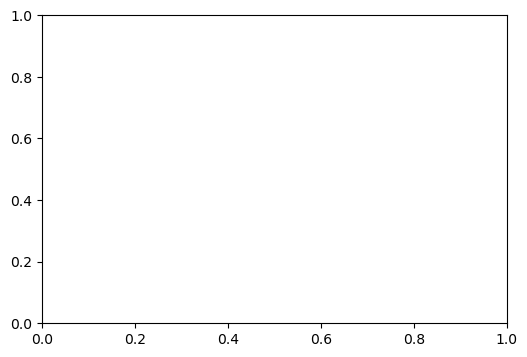

In [3]:
# Figure and Axes
fig, ax = plt.subplots(figsize=(6, 4))  # (width, height) in inches. A4 page is 8.3 x 11.7 inches.

Then let's plot some data and add a legend

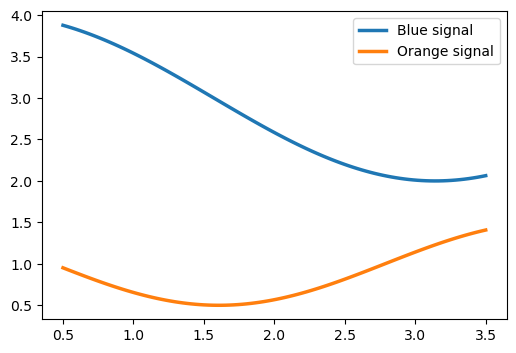

In [4]:
ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal")  # c = color, lw = linewidth, label will be shown in the legend
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.legend()
fig

both `fig` and `ax` are objects with properties we can manipulate.

Let's make same changes to `fig` and `ax`:

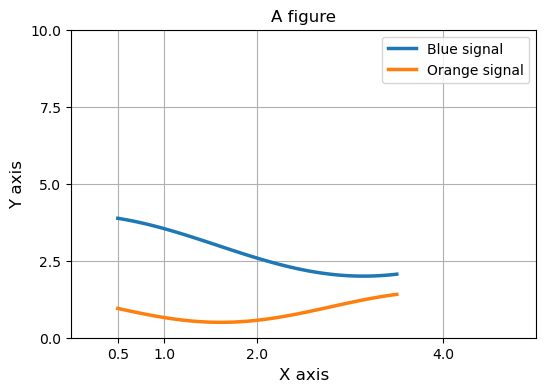

In [5]:
ax.set_title("A figure")  # give it a title
ax.set_xlabel("X axis")  # give it an x-axis label
ax.set_ylabel("Y axis")  # give it a y-axis label

# manually set the limits of x-axis and y-axis
ax.set_xlim(0.0, 5.0)  
ax.set_ylim(0.0, 10.0) 

# set the tick values (which affect the grid lines!)
ax.set_xticks([0.5, 1, 2, 4])
ax.set_yticks([0, 2.5, 5.0, 7.5, 10.0])

ax.grid(True)  # add grid lines
fig

### Getters and setters

Notice that all of the commands above were of the form `ax.set_X()` for some `X`.

This is common in object-oriented programming. Each `X` is a property stored on the object `ax`.

For every `.set_X()` method there is a `.get_X()` method

In [6]:
# example of get_X
ax.get_title()

'A figure'

In [7]:
ax.get_xlim()

(0.0, 5.0)

We can combine `get` and `set` methods to adjust the current state:

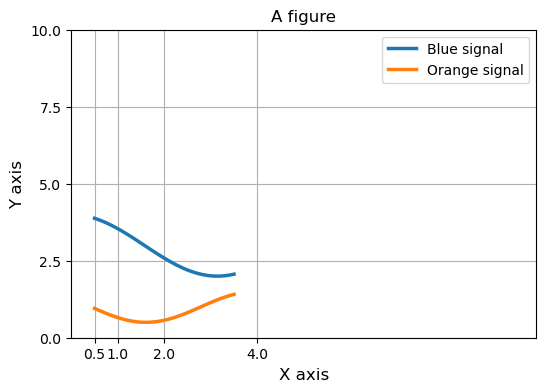

In [8]:
# make the x-axis twice as big
lower, upper = ax.get_xlim()
ax.set_xlim(2 * lower, 2 * upper)
fig

What other choices of `X` are there? Two quick ways to find out:

In [9]:
ax.properties()

{'adjustable': 'box',
 'agg_filter': None,
 'alpha': None,
 'anchor': 'C',
 'animated': False,
 'aspect': 'auto',
 'autoscale_on': False,
 'autoscalex_on': False,
 'autoscaley_on': False,
 'axes_locator': None,
 'axisbelow': 'line',
 'box_aspect': None,
 'children': [<matplotlib.lines.Line2D at 0x2325a3aad90>,
  Text(0.5, 1.0, 'A figure'),
  Text(0.0, 1.0, ''),
  Text(1.0, 1.0, ''),
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'data_ratio': 1.0,
 'default_bbox_extra_artists': [<matplotlib.spines.Spine at 0x2325a32b7d0>,
 'facecolor': (1.0, 1.0, 1.0, 1.0),
 'figure': <Figure size 600x400 with 1 Axes>,
 'frame_on': True,
 'gid': None,
 'gridspec': GridSpec(1, 1),
 'images': <a list of 0 AxesImage objects>,
 'in_layout': True,
 'label': '',
 'legend': <matplotlib.legend.Legend at 0x23259cd1190>,
 'legend_handles_labels': ([<matplotlib.lines.Line2D at 0x2325a3aad90>,
  ['Blue signal', 'Orange signal']),
 'lines': <a list of 2 Line2D objects>,
 'mouseover': False,
 'navigate': 

In [ ]:
# ax.set(  # code completion is great!!!

Most of these are pretty specialist and not worth knowing. But it's still worth playing around with the options for 5 minutes.

We can set many properties at once using a single command:

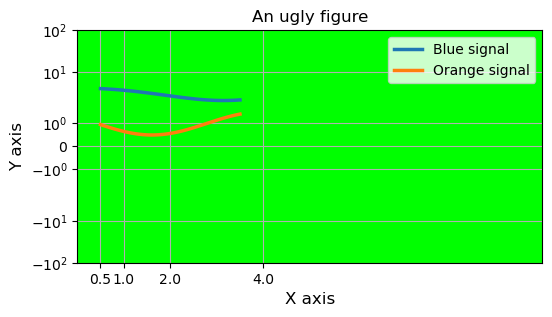

In [10]:
ax.set(
    title="An ugly figure",
    facecolor="lime", 
    ylim=(-100, 100), 
    yscale="symlog",   # logarthimic scale (for both positive & negative numbers). Linear scale in a small window around 0.
    box_aspect=0.5     # alter the ratio of height to width
)
fig

`.set()` can be applied to any object in pyplot. For instance, the `Fig` object contains a `patch` object that we can modify:

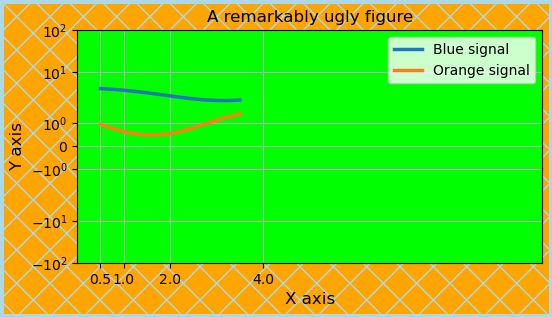

In [11]:
fig.patch.set(hatch='x', color='Lightblue', facecolor='orange', linewidth=5, bounds=(0.0, 0.0, 0.5, 1.0))
ax.set_title("A remarkably ugly figure")
fig

### Children and their parents

We just saw that `patch` is the *child* of `fig`. Every object has children:

In [12]:
fig.get_children()

 <AxesSubplot: title={'center': 'A remarkably ugly figure'}, xlabel='X axis', ylabel='Y axis'>]

In [13]:
ax.get_children()

 Text(0.5, 1.0, 'A remarkably ugly figure'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [ ]:
ax.spines

In [14]:
list(ax.spines.keys())  # ax.spines is a dictionary with these keys

['left', 'right', 'bottom', 'top']

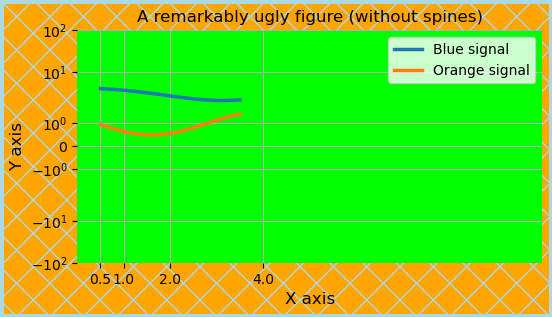

In [15]:
# turn all the spines off
for key in ax.spines.keys():
    ax.spines[key].set(visible=False)

ax.set_title(ax.get_title() + " (without spines)")
fig

### Main takeaways

* <span style='background :Ivory' > Pypot is a hierarchy of objects, each with their own properties </span>

* <span style='background :Ivory' > Use `.set()` with code completion to discover properties and change them </span>

* <span style='background :Ivory' > Use `.get_children()` to see the objects one rung down the hierarchy </span>

*  <span style='background :Ivory' > This information should help you actually understand the answers you copy-paste from stack-overflow. </span>

***

## A simple re-usable plotting function

The previous examples illustrated complex functionality.

But most plots are simple and re-use the same few lines of code.

You should not be constantly re-writing the following code. Write this function *once* and re-use it.

In [17]:
def plot(title, xlabel, ylabel, figsize=(6, 4), xscale="linear", yscale="linear", use_grid=True):
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(xscale=xscale, yscale=yscale, xlabel=xlabel, ylabel=ylabel)  # a convenient way to set lots of properties at once!
    ax.grid(use_grid)
    fig.suptitle(title)  # why not fig.set_title()? I have no idea, and this seems like a bad design choice to me...
    
    return fig, ax

All figures should have a title, xlabel and ylabel, and this function forces you to provide them.

You can obviously edit this `plot()` function to suit your tastes, but keep it simple and avoid adding lots more arguments.

We can still make edits to the figure after creating it on a case-by-case basis.

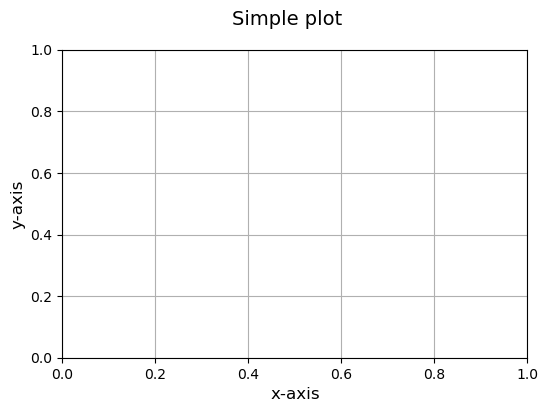

In [18]:
fig, ax = plot("Simple plot", "x-axis", "y-axis")  # one line and easy to read!

Now let's add data to it

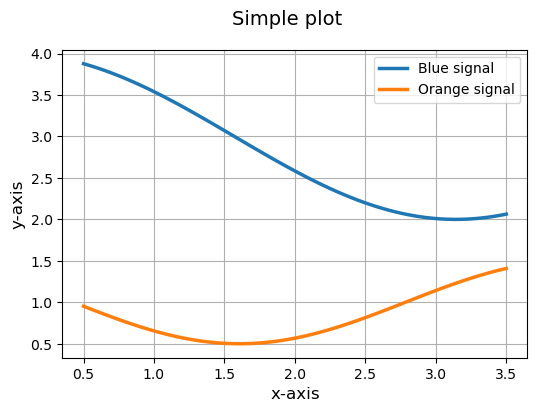

In [19]:
ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal")  # c = color, lw = linewidth, label will be shown in the legend
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.legend()
fig

Notice how the x-axis and y-axis automatically re-scaled themselves to accomodate the data

## A less simple subplots function

In this section, we will slowly develop a function like the one above, but for multiple subplots.

A Figure can contain multiple Axes, like so:

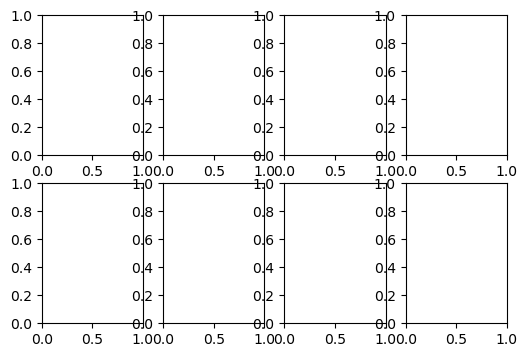

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(6, 4))

But these axes are bunched up and have a bad width/height ratio. This is because we did not change `figsize`, which controls the width and height of the entire Figure and not each Axes.

We have to multiply the width of the figure by the number of columns, and the height by the number of rows.

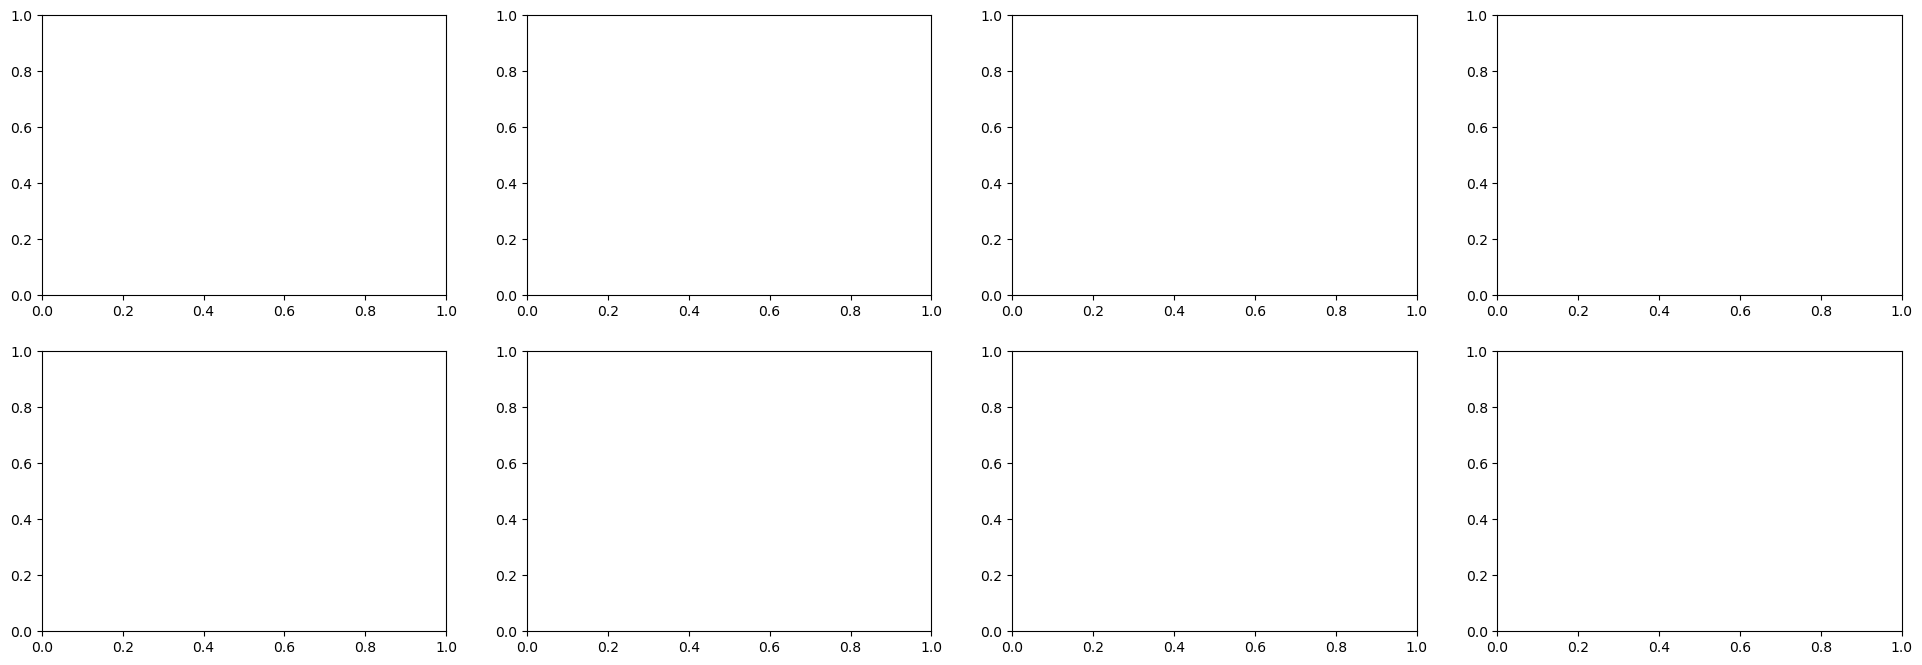

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(4*6, 2*4))

But now if we change the number of columns or rows, we have to remember to change the figsize!

Let's avoid this by making a custom function:

In [22]:
def subplots(nrows, ncols, width=6, height=4):
    figsize=(width * ncols, height * nrows)
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    return fig, axs

Now we can create lots of nice subplots (and the code is much easier to read)

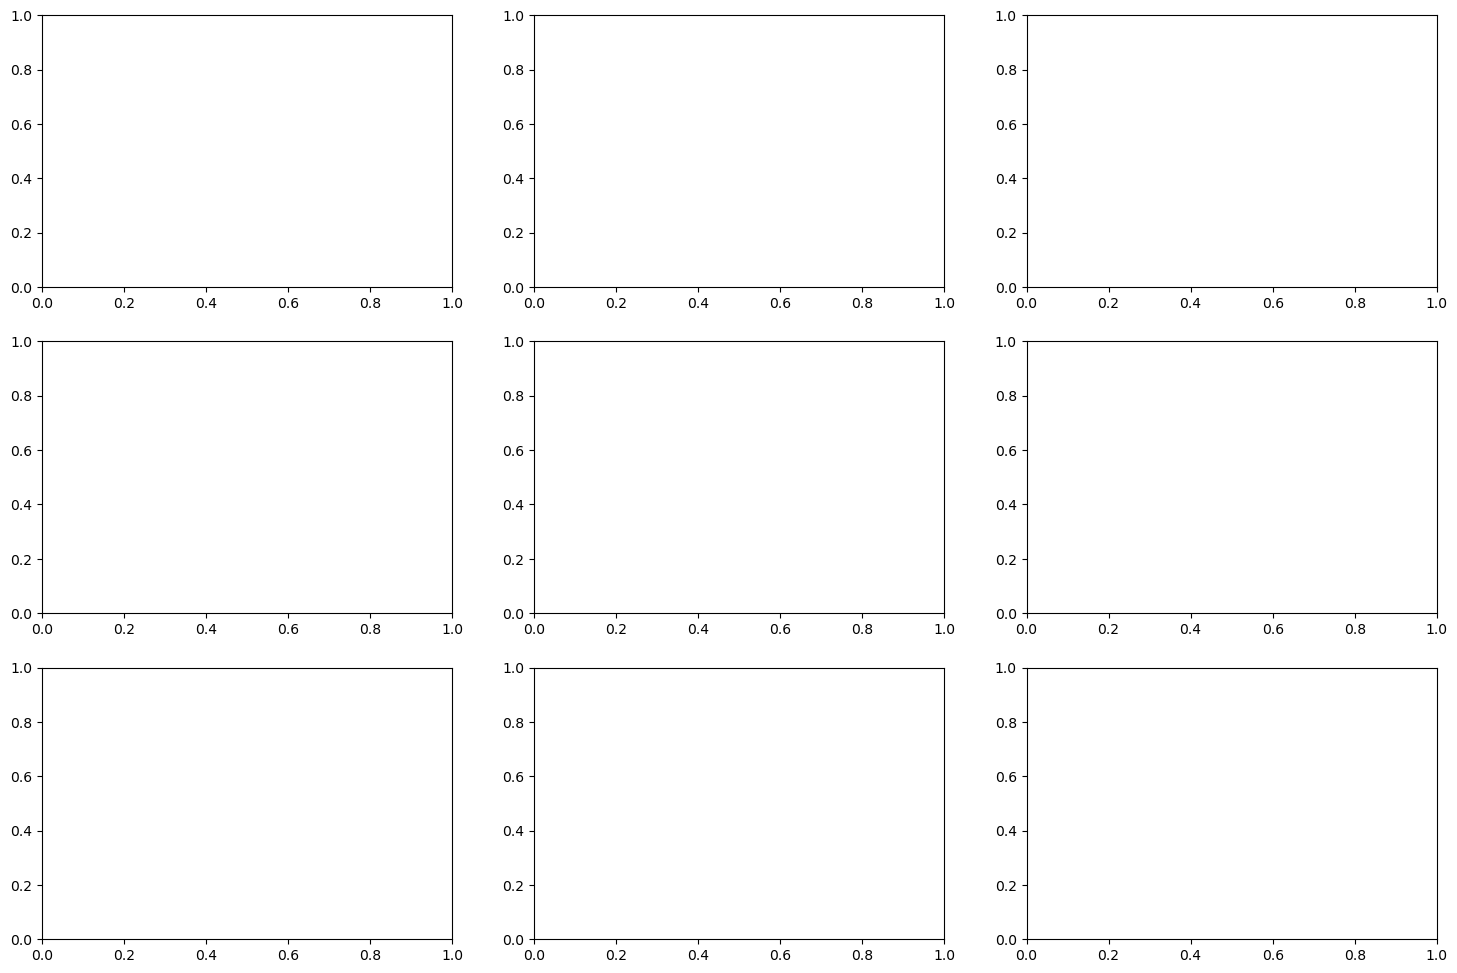

In [23]:
fig, axs = subplots(3, 3)

But the tick labels are too small! 

This is because the entire figure is now 18 x 12 inches, whilst the size of the font has remained fixed at the default value of 10pt = 10/72 inches.

In [24]:
print("width & height of figure:", fig.get_size_inches())  # another helpful property
print("fontsize:", mpl.rcParams['font.size'])  # don't worry, we will explain what rcParams is later...

width & height of figure: [18. 12.]
fontsize: 10.0


We could increase the fontsize to fix this (as discussed later). 

But maybe we shouldn't create such a large figure in the first place. Let's scale down each subplot by defining a `scale` argument in our `subplots` function.

In [25]:
def subplots(nrows, ncols, width=6, height=4, scale="auto"):
    
    # original figure width & height before scaling
    fig_width = width * ncols
    fig_height = height * nrows
    
    if scale == "auto":
        scale = min(1.0, 10.0 / fig_width)  # width of figure cannot exceede 10 inches
        scale = min(scale, 10.0 / fig_height)  # height of figure cannot exceede 10.0 inches
    
    figsize=(scale * fig_width, scale * fig_height)
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    
    return fig, axs

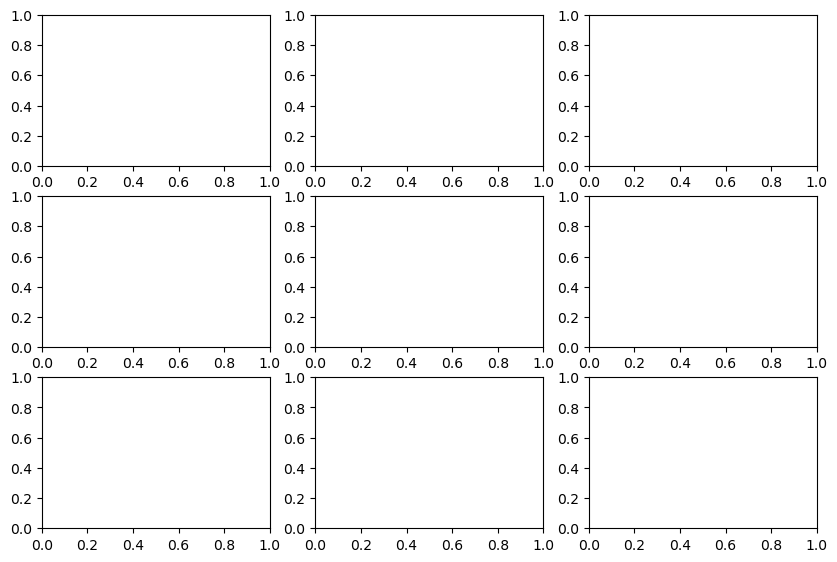

In [26]:
fig, axs = subplots(3, 3)

In [27]:
# Figure widths between 6-12 inches are recommended to avoid needing to changing the fontsize
fig.get_size_inches()

array([10.        ,  6.66666667])

Great, we fixed the fontsize problem. But do we really need all of these tick labels everywhere? and where are the axis labels?

Let's make a few final modifications to our `subplots` function to:
* share ticks and use grid lines
* share xlabels and ylabels
* add a title

In [28]:
def subplots(nrows, ncols, title, xlabel, ylabel, width=6, height=4, scale="auto", sharex=True, sharey=True, grid=True):
    
    fig_width = width * ncols
    fig_height = height * nrows
    
    if scale == "auto":
        scale = min(1.0, 10.0/fig_width)  # width of figure cannot exceede 10 inches
        scale = min(scale, 10.0/fig_height)  # height of figure cannot exceede 10 inches
    
    figsize=(scale * fig_width, scale * fig_height)
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize, sharex=sharex, sharey=sharey)
    
    for ax in axs.flat:
        ax.grid(grid)  # maybe add grid lines
        
    fig.suptitle(title)
    fig.supxlabel(xlabel)
    fig.supylabel(ylabel)
    fig.tight_layout()  # adjust the padding between and around subplots to neaten things up
    
    return fig, axs

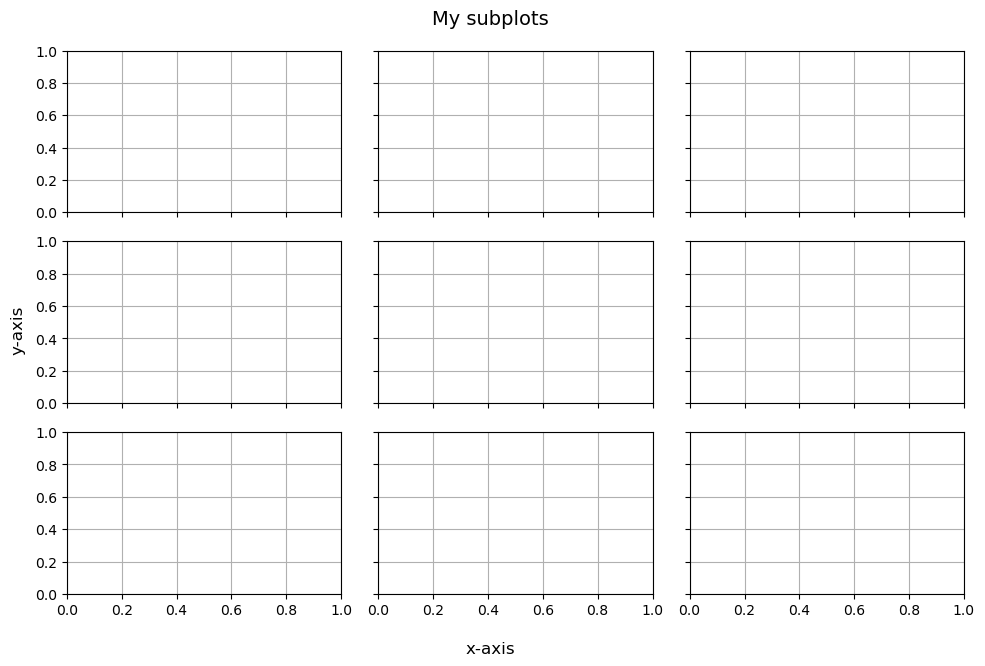

In [29]:
fig, axs = subplots(3, 3, "My subplots", "x-axis", "y-axis")

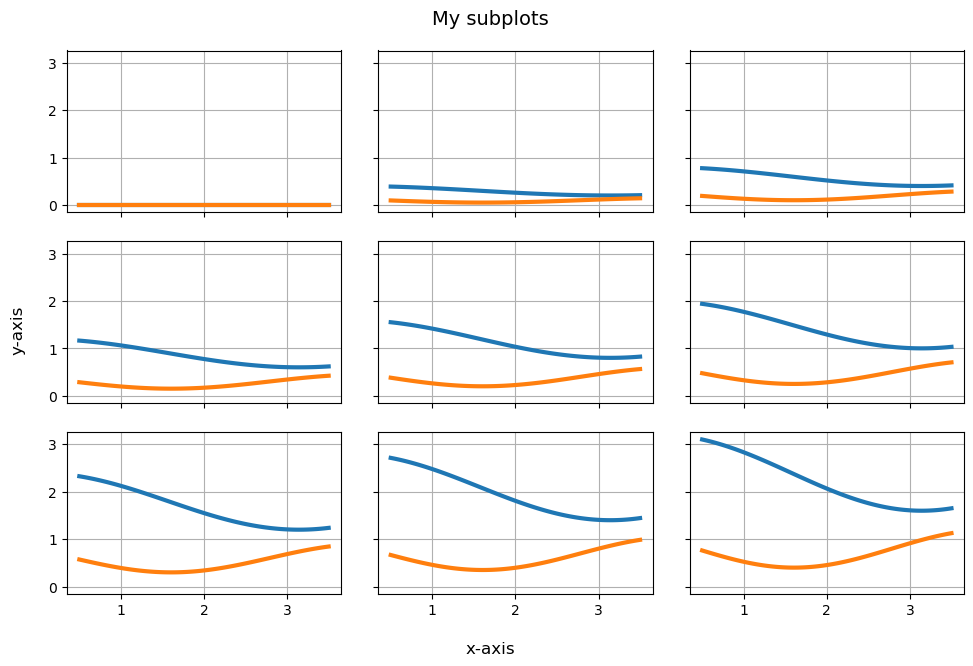

In [30]:
for i, ax in enumerate(axs.flat):
    ax.plot(X, Y1*(i/10), lw=3)
    ax.plot(X, Y2*(i/10), lw=3)
fig

In [ ]:
#  plt.style.use('default')

## Global configurations

`plt.style` allows you to alter the aesthetics of all your plots

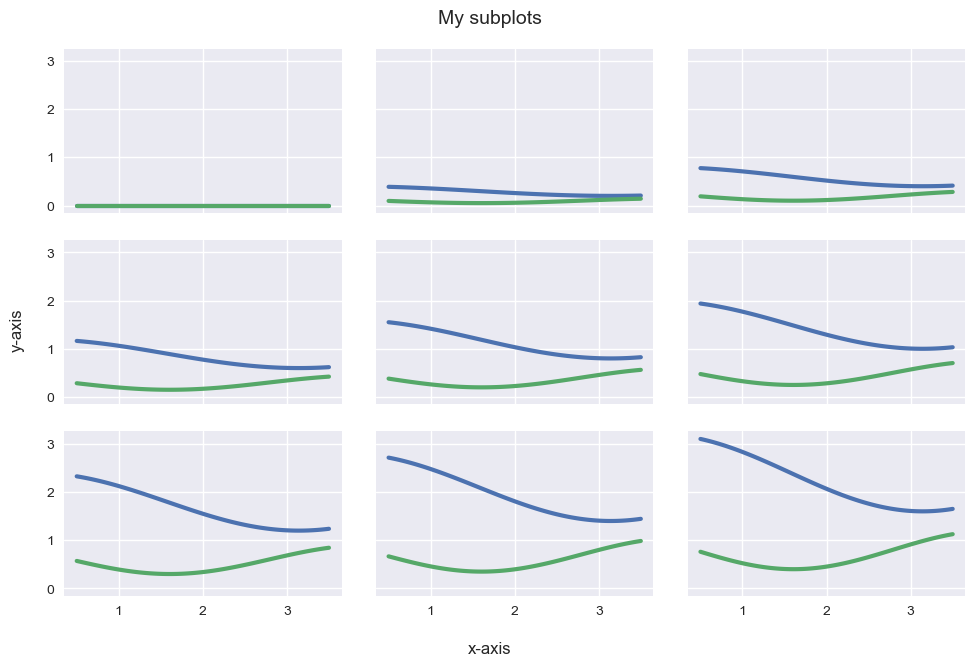

In [31]:
plt.style.use('seaborn-v0_8')

fig, axs = subplots(3, 3, "My subplots", "x-axis", "y-axis")
for i, ax in enumerate(axs.flat):
    ax.plot(X, Y1*(i/10), lw=3)
    ax.plot(X, Y2*(i/10), lw=3)

In [32]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


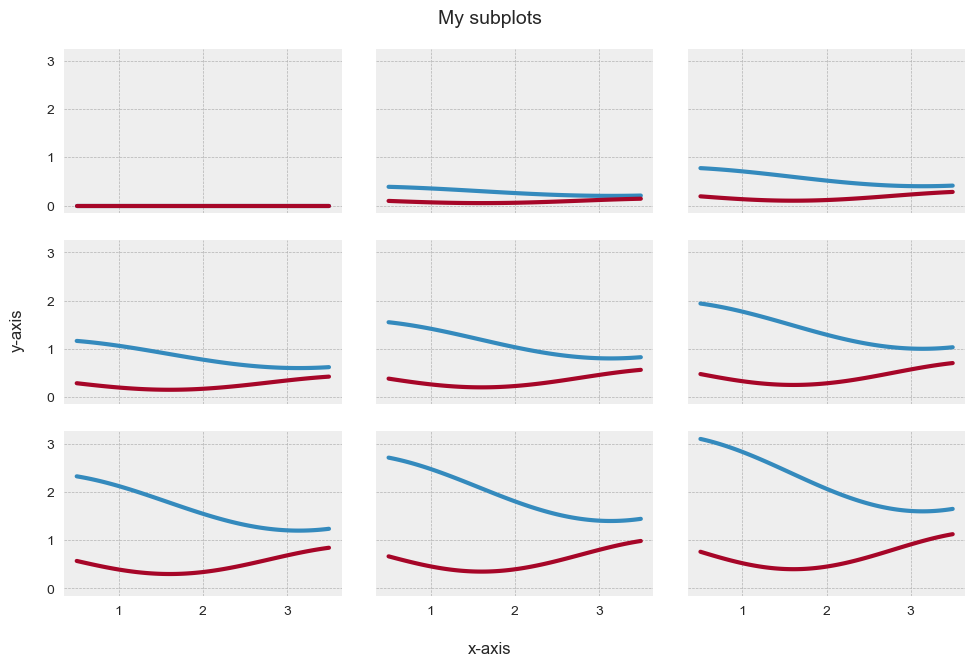

In [33]:
plt.style.use('bmh')

fig, axs = subplots(3, 3, "My subplots", "x-axis", "y-axis")
for i, ax in enumerate(axs.flat):
    ax.plot(X, Y1*(i/10), lw=3)
    ax.plot(X, Y2*(i/10), lw=3)

These styles make global alterations to pyplots settings

You can alter these settings too with `plt.rc`

In [34]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIG_SIZE = 12
HUGE_SIZE=14
MEGA_SIZE=16

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes          
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIG_SIZE)    # fontsize of the x and y labels
plt.rc('figure', titlesize=MEGA_SIZE)  # fontsize of the figure title

and the fonts themselves:

In [35]:
plt.rc('font', family='sans-serif')
plt.rc('font', serif='Palatino')

or any other property of a figure you care about...

In [36]:
plt.rc('lines', linewidth=10)

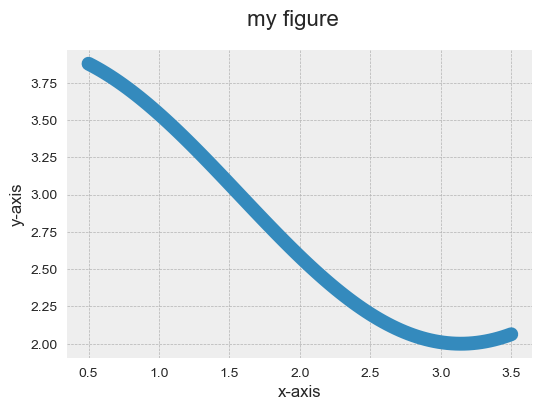

In [37]:
fig, ax = plot("my figure", "x-axis", "y-axis")
ax.plot(X, Y1)

## A function for saving figures

In [39]:
def save_fig(fig, save_dir, name="", both_formats=True, close=True):
    
    filename = os.path.join(save_dir, f"{name}.pdf")
    fig.savefig(filename, bbox_inches='tight', dpi=300)
    
    if both_formats:
        fig.savefig(os.path.join(save_dir, f"{name}.png"), bbox_inches='tight', dpi=300)
    if close:
        plt.close(fig)  # otherwise figure may hang around in memory

In [40]:
save_fig(fig, "figures", name="cool_figure")

## Latex in figures

Warning: latex must be installed on your machine!

In [41]:
plt.rc('text', usetex=True)  # make latex look nice

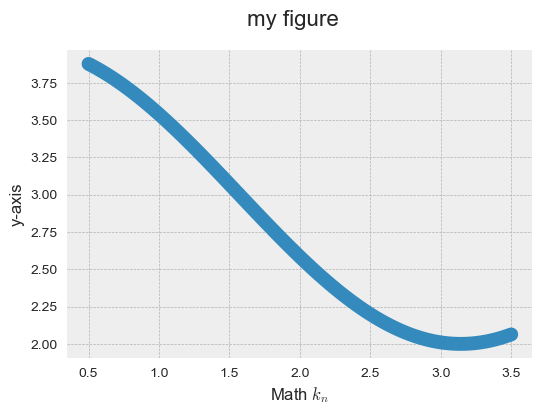

In [42]:
ax.set_xlabel(r"Math $k_n$")  # $\sum_n^{\infty} \frac{1}{n^2}$
fig